<a href="https://colab.research.google.com/github/lanashin/Data_Viz/blob/main/AIRBNB2019_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My project is about Airbnb company. Airbnb is a paid community platform for renting and booking private accommodation founded in 2008.
Airbnb allows individuals to rent all or part of their own homes as extra accommodation. The site offers a search and booking platform between the person offering their accommodation and the vacationer who wishes to rent it.
The dataset that I worked on for this project is taken from the Kaggle website. It consists of around 49,000 rows and 16 columns and it is a mix of categorical and numeric values.

In [159]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [160]:
# Read the data into a pandas DataFrame.    
data = pd.read_csv("https://raw.githubusercontent.com/lanashin/Data_Viz/main/AB_NYC_2019.csv")   
data 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [161]:
#to check how many columns it has and what data types
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Question1: What borough in NYC do people use the most to rent Airbnb?

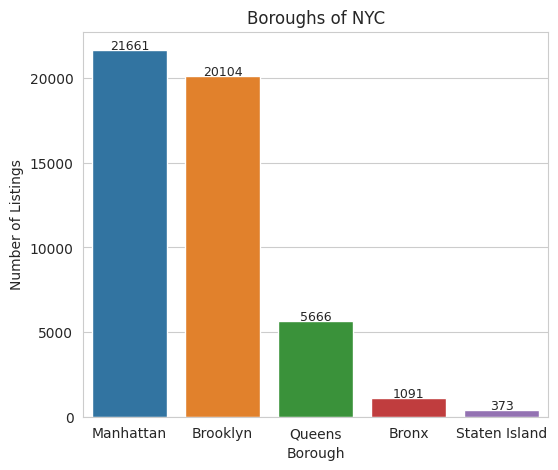

In [162]:
top_boroughs = data['neighbourhood_group'].value_counts().nlargest(5)
plt.figure(figsize=(6,5))
sns.barplot(x=top_boroughs.index, y=top_boroughs.values) #color='#6495ed')
plt.title('Boroughs of NYC')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')

# Add number of listings on top of each bar
for i, v in enumerate(top_boroughs.values):
    plt.text(i, v+50, str(v), ha='center', fontsize=9)

plt.show()

We can see from this chart that the most rented borough in NYC is Manhattan with 21,661 rents in 2019. It's not surprising because most of the tourist attractions happen in Manhattan and renting a place closer to attractions allows tourists to commute less in the city. 
Second, the most rented borough is Brooklyn with 20,104 rents in 2019 and it might be because it's cheaper to rent in Brooklyn than in Manhattan, it's a bigger territory and also close to Manhattan.

## Qestion2: What are 5 of the most rented neighborhoods in NYC?

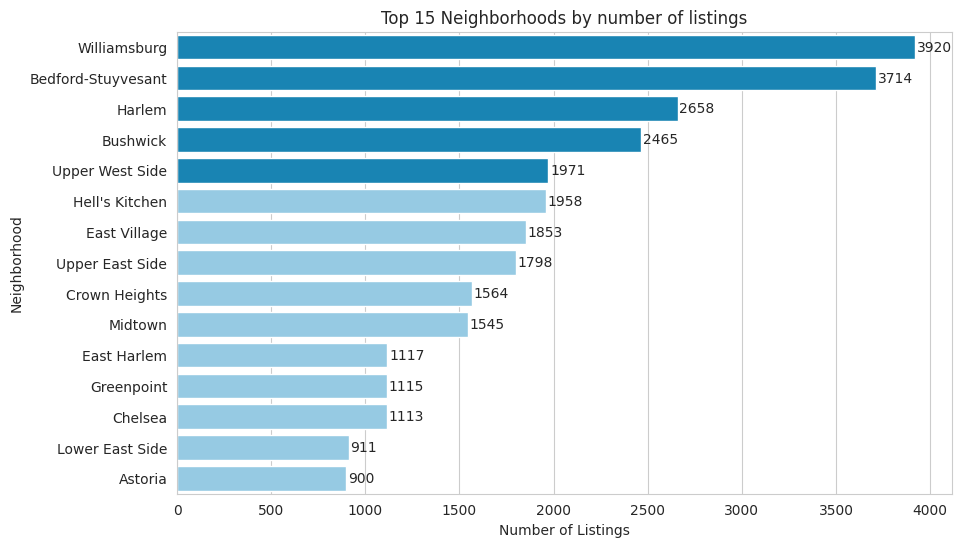

In [163]:
top_neighborhoods = data['neighbourhood'].value_counts().nlargest(15)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, orient='h', 
            palette=['#008ECC' if i < 5 else '#89CFF0' for i in range(len(top_neighborhoods))])
plt.title('Top 15 Neighborhoods by number of listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')

# add count numbers inside the frame
for i, count in enumerate(top_neighborhoods.values):
    plt.text(count + 10, i, str(count), va='center')

plt.show()

In this chart, presented the top 15 neighnorhoods in NYC that were rented the most by tourists. I put in stronger color, 5 the most rented neighborhoods and how many listings they have. 

## Question3: What is the room type that was listed the most in top neighborhoods?

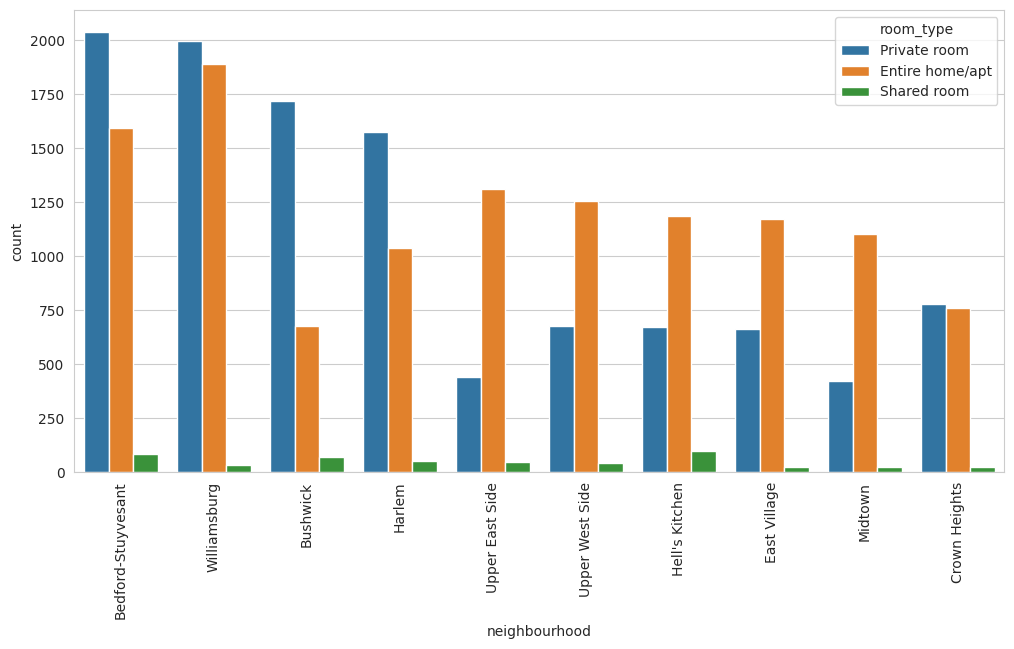

In [164]:
# select only entire home/apt, private room, and shared room listings in Manhattan and Brooklyn for top 10 neighborhoods
top_neighborhoods = ['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side', 
                     'Hell\'s Kitchen', 'East Village', 'Upper East Side', 'Crown Heights', 'Midtown']
roomt = data.loc[(data['room_type'].isin(['Entire home/apt', 'Private room', 'Shared room'])) &
                 (data['neighbourhood_group'].isin(['Manhattan', 'Brooklyn'])) &
                 (data['neighbourhood'].isin(top_neighborhoods))]

# group by neighborhood and room type, then calculate count and sort by count
grouped = roomt.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')
grouped = grouped.sort_values(by='count', ascending=False)

# plot histogram of number of entire home/apt, private room, and shared room listings in Manhattan and Brooklyn
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='neighbourhood', y='count', hue='room_type')
plt.xticks(rotation=90)
plt.show()

This chart presented room types (Entire home/apt, Private room, Shared room) and we can see now besides the number of listings in different neighborhoods we can see the type of room that is listed. we can see that in Bedforford-Styvesant the most listed are Private room types and in Williamsburg, the most listed are entire home apartments. What can explain the higher numbers of rent in the previous chart.

## Question4: Can we map our results?

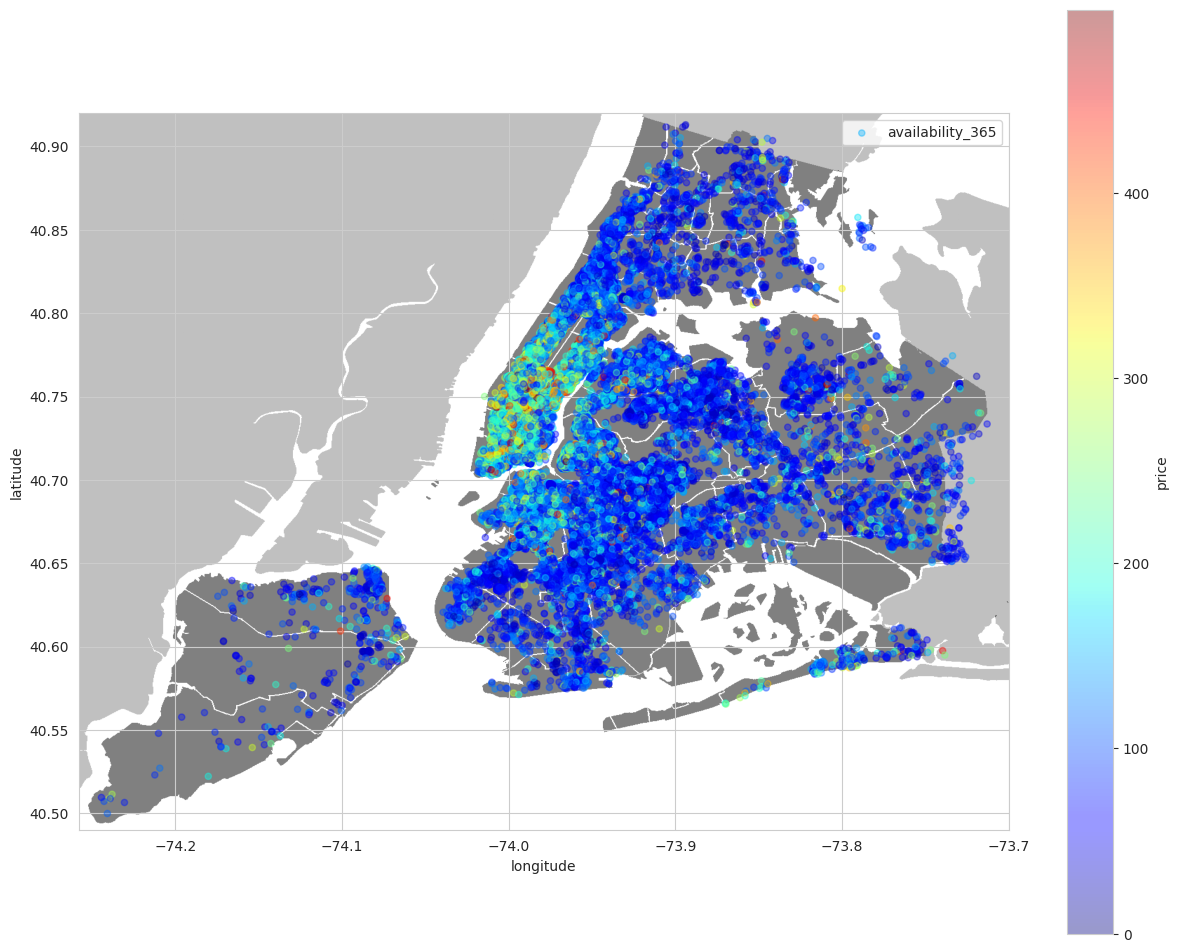

In [165]:
import urllib.request # used for making HTTP requests to web pages and other online resources
import matplotlib.pyplot as plt

# creating a sub-dataframe with no extreme values, price less than 500
data_price = data[data.price < 500]

# downloading the png NYC image found on Google and saving to my local folder along with the project
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
filename, headers = urllib.request.urlretrieve(url)

# reading the image from the local file
nyc_img = plt.imread(filename)

# creating a bigger plot size
fig, ax = plt.subplots(figsize=(15, 12))

# using scatter plot
data_price.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

# plotting the image as background
ax.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

plt.legend()
plt.show()


## Question5: Can we present data on map using neighbors?

In [166]:
#extends the popular pandas library with additional functionality 
#pip install geopandas

In [167]:
import geopandas as gpd

data.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)

#Get a count by borough
borough_count = data.groupby('boroname').agg('count').reset_index()

#Here we are using geopandas to bring in a base layer of NYC boroughs
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))

# read in the New York City boroughs data
boroughs = gpd.read_file(gpd.datasets.get_path('nybb'))

# preview the first 5 rows of the data
print(boroughs.head(5))

#rename the column to boroname, so that we can join the data to it on a common field
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(borough_count, on='boroname')

# read the file for neighbors. Found it on this website: https://data.cityofnewyork.us/City-Government/2010-Neighborhood-Tabulation-Areas-NTAs-/cpf4-rkhq  
hoods = pd.read_csv("https://raw.githubusercontent.com/lanashin/Data_Viz/main/nynta.csv")   
hoods

<ipython-input-167-0811c9d5a0fd>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
<ipython-input-167-0811c9d5a0fd>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  boroughs = gpd.read_file(gpd.datasets.get_path('nybb'))


   BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...  


,the_geom,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07
1,MULTIPOLYGON (((-73.8870514253612 40.884349575...,2,Bronx,5,BX28,Van Cortlandt Village,21945.719299,2.566612e+07
2,MULTIPOLYGON (((-73.80576840191371 40.68293239...,4,Queens,81,QN55,South Ozone Park,36708.169305,8.246139e+07
3,MULTIPOLYGON (((-73.98017161103701 40.66115465...,3,Brooklyn,47,BK40,Windsor Terrace,19033.672066,1.404167e+07
4,MULTIPOLYGON (((-73.88833929256353 40.64671022...,3,Brooklyn,47,BK50,Canarsie,43703.609666,8.208968e+07
...,...,...,...,...,...,...,...,...
190,MULTIPOLYGON (((-73.90129277627032 40.82047544...,2,Bronx,5,BX34,Melrose South-Mott Haven North,19589.196431,1.727176e+07
191,MULTIPOLYGON (((-73.89680883223774 40.79580844...,2,Bronx,5,BX39,Mott Haven-Port Morris,35604.790810,4.189861e+07
192,MULTIPOLYGON (((-73.9119181232027 40.843257886...,2,Bronx,5,BX63,West Concourse,28571.879354,1.936642e+07
193,MULTIPOLYGON (((-74.072581339395 40.6379418745...,5,Staten Island,85,SI22,West New Brighton-New Brighton-St. George,66052.593065,5.602857e+07


In [168]:
from shapely import wkt #The wkt module is part of the shapely library, which provides tools for working with geometric objects in Python. 

#rename the column
hoods.rename(columns={'NTAName':'neighbourhood'}, inplace=True)

#since this is a csv file, convert the geometry column text into well known text, this will allow me to plot its geometry correctly
hoods['geom'] = hoods['the_geom'].apply(wkt.loads)

#convert the pandas dataframe into a Geopandas GeoDataFrame
hoods = gpd.GeoDataFrame(hoods, geometry='geom')

#create a point of each Airbnb location, and enable the "data" dataframe into a geopandas dataframe
data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

#this code runs an intersect analysis to find which neighborhood the Airbnb location is in
joined = gpd.sjoin(hoods, data, how='inner', op='intersects')
joined.head(3)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,the_geom,BoroCode,BoroName,CountyFIPS,NTACode,neighbourhood_left,Shape_Leng,Shape_Area,geom,index_right,...,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",1103,...,40.67747,-73.76493,Shared room,39,1,454,2019-06-18,5.27,1,353
0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",37794,...,40.67748,-73.76376,Entire home/apt,100,1,12,2019-02-17,1.69,1,161
0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",35688,...,40.67783,-73.76637,Private room,83,2,2,2019-04-15,0.26,3,26


In [169]:
joined.dtypes

the_geom                            object
BoroCode                             int64
BoroName                            object
CountyFIPS                           int64
NTACode                             object
neighbourhood_left                  object
Shape_Leng                         float64
Shape_Area                         float64
geom                              geometry
index_right                          int64
id                                   int64
name                                object
host_id                              int64
host_name                           object
boroname                            object
neighbourhood_right                 object
latitude                           float64
longitude                          float64
room_type                           object
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per

In [170]:
#drop the second geometry column
joined.drop(columns='geom', inplace=True)

#rename the column. 
joined.rename(columns={'neighbourhood_left':'neighbourhood'}, inplace=True)

#create a count of each neighborhood
nb_join_count = joined.groupby('neighbourhood').agg('count').reset_index()

#"true count". Join this data to the original neighborhoods geometry 
true_count = hoods.merge(nb_join_count, on='neighbourhood')

Text(0.5, 1.0, 'Number of Airbnb listings by Neighborhood in NYC')

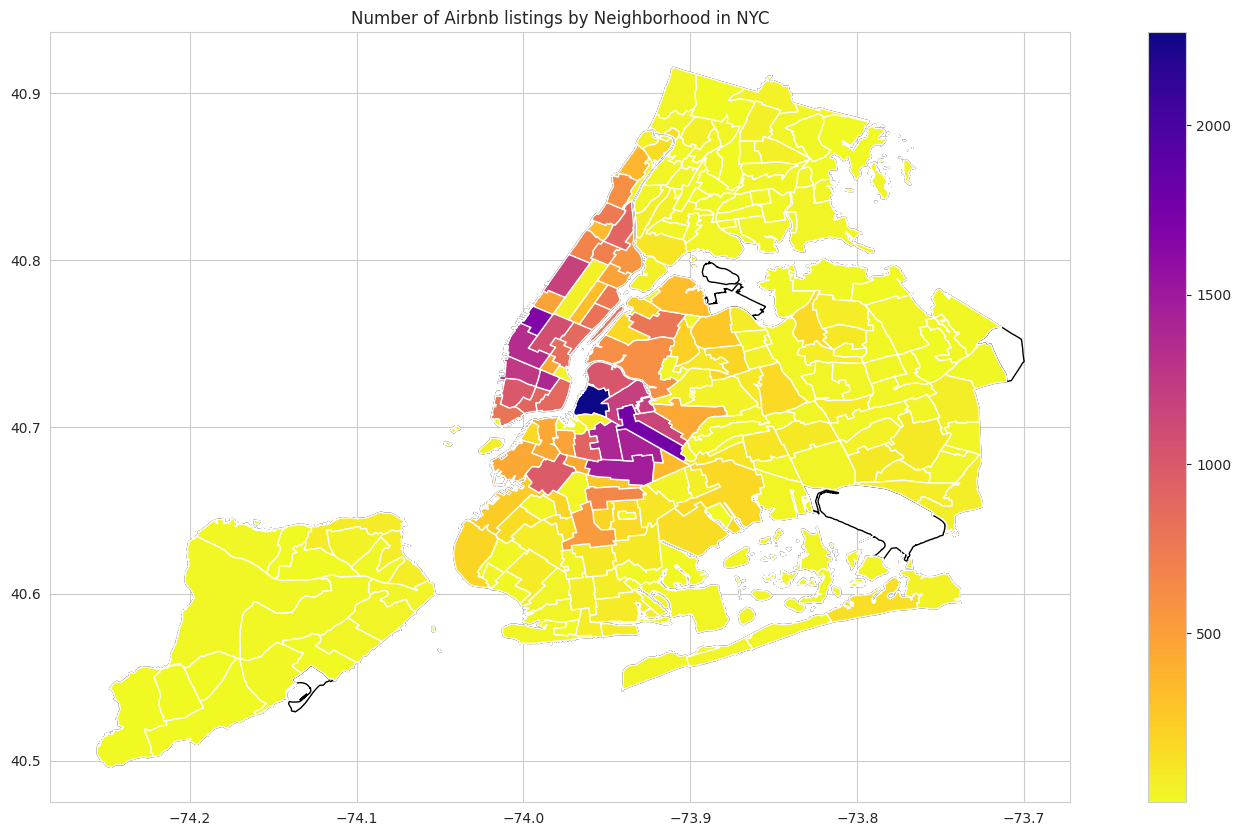

In [171]:
#we plot the data
fig,ax = plt.subplots(1,1, figsize=(20,10))

base = hoods.plot(color='white', edgecolor='black', ax=ax)

true_count.plot(column='id',cmap='plasma_r', ax=base, legend=True)
plt.title('Number of Airbnb listings by Neighborhood in NYC')


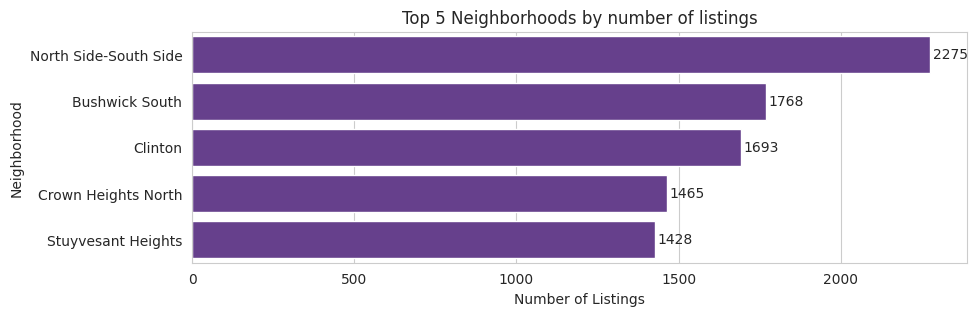

In [172]:
top_neighborhoods = joined['neighbourhood'].value_counts().nlargest(5)
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, orient='h', color='#663399')
plt.title('Top 5 Neighborhoods by number of listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')

# add count numbers inside the frame
for i, count in enumerate(top_neighborhoods.values):
    plt.text(count + 8, i, str(count), va='center')

plt.show()


We can see on the map 5 main neighborhoods that have the highest number of listings. I also created the other chart to make sure that the data presented on the map is correct. 